In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and add noise to the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [3]:

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [4]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# Reshape the data to (28, 28, 1) and add a channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))


In [6]:
# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


In [7]:
# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise images using the trained autoencoder
decoded_imgs = autoencoder.predict(x_test_noisy)


Epoch 1/10
469/469 [==============================] - 107s 226ms/step - loss: 0.1545 - val_loss: 0.1128
Epoch 2/10
469/469 [==============================] - 111s 237ms/step - loss: 0.1105 - val_loss: 0.1056
Epoch 3/10
469/469 [==============================] - 113s 242ms/step - loss: 0.1053 - val_loss: 0.1025
Epoch 4/10
469/469 [==============================] - 110s 235ms/step - loss: 0.1026 - val_loss: 0.1008
Epoch 5/10
469/469 [==============================] - 110s 236ms/step - loss: 0.1009 - val_loss: 0.0992
Epoch 6/10
469/469 [==============================] - 105s 225ms/step - loss: 0.0997 - val_loss: 0.0984
Epoch 7/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0987 - val_loss: 0.0976
Epoch 8/10
469/469 [==============================] - 107s 228ms/step - loss: 0.0979 - val_loss: 0.0969
Epoch 9/10
469/469 [==============================] - 110s 236ms/step - loss: 0.0971 - val_loss: 0.0963
Epoch 10/10
313/313 [==============================] - 5s 14ms/s

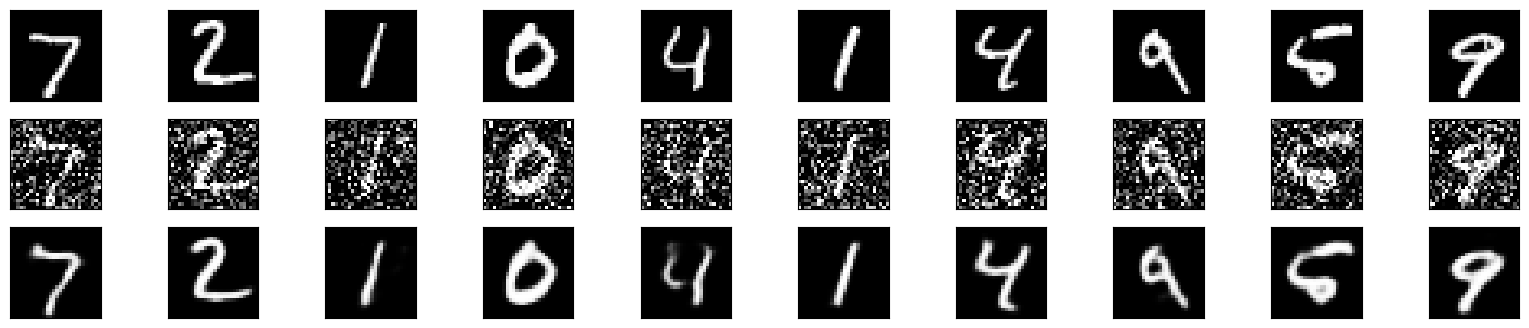

In [9]:
# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
